In [2]:
# Import the required packages

import pandas as pd # for handling data in the form of tables
import numpy as np # For handling matrix
import matplotlib.pyplot as plt # for plotting

from sklearn.model_selection import train_test_split # For spliting the data into train and test
from sklearn.linear_model import LinearRegression # for using the model
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error

In [3]:
pwd

'C:\\Users\\hi\\Documents\\Artificial Intelligence'

In [46]:
# importing a dataset

data = pd.read_csv(r"C:\Users\hi\Downloads\500_Person_Gender_Height_weight_Index.csv")
data = data.loc[data['Index']==2] # Let's consider data whose index is 2.
data.head()

,Gender,Height,Weight,Index
1,Male,189,87,2
10,Male,195,81,2
13,Male,155,51,2
14,Male,191,79,2
24,Female,172,67,2


In [47]:
data.shape

(69, 4)

In [48]:
data.columns

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

In [49]:
for i in data:
    print(i)

Gender
Height
Weight
Index


In [50]:
data.ndim

2

In [51]:
data.isna()

,Gender,Height,Weight,Index
1,False,False,False,False
10,False,False,False,False
13,False,False,False,False
14,False,False,False,False
24,False,False,False,False
...,...,...,...,...
472,False,False,False,False
477,False,False,False,False
478,False,False,False,False
487,False,False,False,False


In [52]:
data.isna().any()

Gender    False
Height    False
Weight    False
Index     False
dtype: bool

In [53]:
data.isna().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [54]:
data.describe()

,Height,Weight,Index
count,69.000000,69.000000,69.0
mean,174.260870,69.086957,2.0
std,13.786878,12.062020,0.0
min,148.000000,50.000000,2.0
25%,163.000000,59.000000,2.0
50%,177.000000,68.000000,2.0
75%,185.000000,79.000000,2.0
max,199.000000,99.000000,2.0


In [55]:
data.describe(include='all')

,Gender,Height,Weight,Index
count,69,69.000000,69.000000,69.0
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,41,NaN,NaN,NaN
mean,NaN,174.260870,69.086957,2.0
std,NaN,13.786878,12.062020,0.0
min,NaN,148.000000,50.000000,2.0
25%,NaN,163.000000,59.000000,2.0
50%,NaN,177.000000,68.000000,2.0
75%,NaN,185.000000,79.000000,2.0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 1 to 490
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  69 non-null     object
 1   Height  69 non-null     int64 
 2   Weight  69 non-null     int64 
 3   Index   69 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


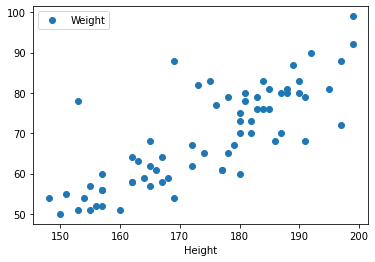

In [57]:
data.plot(x='Height',y='Weight',style='o') # Here Height is X (independent variable) and weight is Y (dependent variable).

In [58]:
# <---------->

In [59]:
'''
Note that, the column values are in the form of series. But a model expect the valu
es in the form of numpy array. So, we should convert the data into [n,1] array( n r
ows and 1 column )

Now trying to reshape with (-1, 1) . We have provided column as 1 but rows as unkno
wn . So we get result new shape as 2 dimentions.
'''

'\nNote that, the column values are in the form of series. But a model expect the valu\nes in the form of numpy array. So, we should convert the data into [n,1] array( n r\nows and 1 column )\n\nNow trying to reshape with (-1, 1) . We have provided column as 1 but rows as unkno\nwn . So we get result new shape as 2 dimentions.\n'

In [60]:
x = data['Height'].values.reshape(-1,1)
y = data['Weight'].values.reshape(-1,1)

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [62]:
# Printing X_train,X_test,Y_train,Y_test

print("X_train- Training data (features) size is ",x_train.shape)
print("X_test- Test data (features) size is ",x_test.shape)
print("Y_train- Training data (labels) size is ",y_train.shape)
print("Y_test- Test data (labels) size is ",y_test.shape)

X_train- Training data (features) size is  (55, 1)
X_test- Test data (features) size is  (14, 1)
Y_train- Training data (labels) size is  (55, 1)
Y_test- Test data (labels) size is  (14, 1)


In [63]:
model = LinearRegression()

In [64]:
model.fit(x_train,y_train)

LinearRegression()

In [65]:
y_pred = model.predict(x_test)

In [66]:
y_pred

array([[74.35007138],
       [82.2541911 ],
       [83.57154439],
       [79.61948453],
       [78.96080789],
       [67.76330495],
       [56.56580201],
       [68.42198159],
       [73.0327181 ],
       [84.88889768],
       [78.30213124],
       [75.00874803],
       [54.58977208],
       [77.6434546 ]])

In [67]:
slope = model.coef_
slope # this is 'm' in y=m*x+c

array([[0.65867664]])

In [68]:
intercept = model.intercept_
intercept # this is 'c' in y=m*x+c

array([-46.18775434])

In [69]:
# flatten() function is used to get a copy of an given array collapsed into one dimension.

Actual_predicted=pd.DataFrame({'predicted':y_pred.flatten(), 'Actual':y_test.flatten()})
Actual_predicted

,predicted,Actual
0,74.350071,79
1,82.254191,81
2,83.571544,88
3,79.619485,68
4,78.960808,80
5,67.763305,82
6,56.565802,52
7,68.421982,65
8,73.032718,80
9,84.888898,92


Text(0, 0.5, 'Weight of a person')

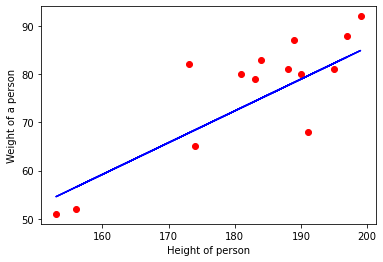

In [70]:
plt.scatter(x_test,y_test,color='red') # Original values are plotted in red
plt.plot(x_test,y_pred, color='blue') # Predicted values are plottedin blue
plt.xlabel("Height of person") # Name of X-axis
plt.ylabel("Weight of a person") # Name of Y-axis

In [71]:
print(r2_score(y_test,y_pred))

0.6747499423053709


In [72]:
print(mean_absolute_error(y_test,y_pred))

5.923539504824575


In [73]:
print(mean_squared_error(y_test,y_pred))

48.35107617881841


In [84]:
# <---------->

In [85]:
# Predicting an unknown weight from height with the model

In [86]:
z=np.array([188])

In [87]:
model.predict(z.reshape(1,-1))

array([[77.6434546]])